<a href="https://colab.research.google.com/github/jafetimbre/ms-school-stuff/blob/master/image-processing/watershed-obj-segmentation/watershed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from urllib.request import urlopen
import matplotlib.pyplot as plt

In [2]:
def show_im(img):
    plt.figure(figsize = (10, 6))
    plt.axis("off")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

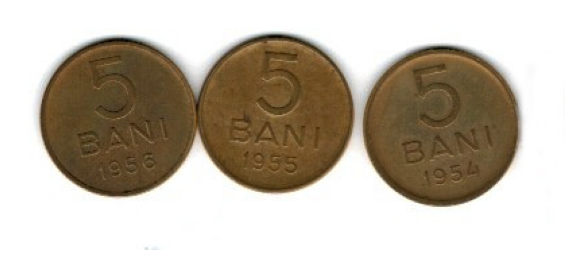

In [3]:
req = urlopen("https://raw.githubusercontent.com/jafetimbre/ms-school-stuff/master/image-processing/watershed-obj-segmentation/res/bani.jpg")
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
coins = cv2.imdecode(arr, -1)

show_im(coins)

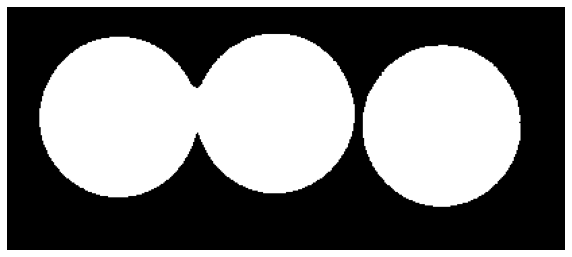

In [4]:
gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

show_im(thresh)

In [5]:
# noise removal
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

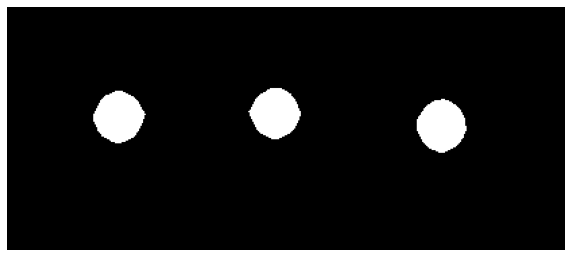

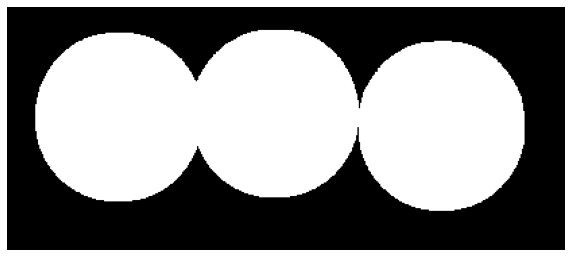

In [6]:
show_im(sure_fg)
show_im(sure_bg)

In [7]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [8]:
markers = cv2.watershed(coins, markers)
coins[markers == -1] = [255,0,0]

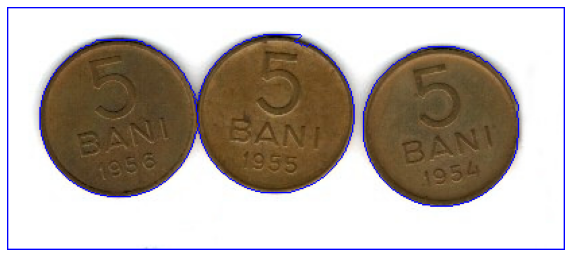

In [9]:
show_im(coins)